In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

In [2]:
img = data.astronaut()
img = rgb2gray(img)

In [3]:
s = np.linspace(0, 2*np.pi, 400)
x = 220 + 100*np.cos(s)
y = 100 + 100*np.sin(s)
init = np.array([x, y]).T

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  """Entry point for launching an IPython kernel.


(0.0, 512.0, 512.0, 0.0)

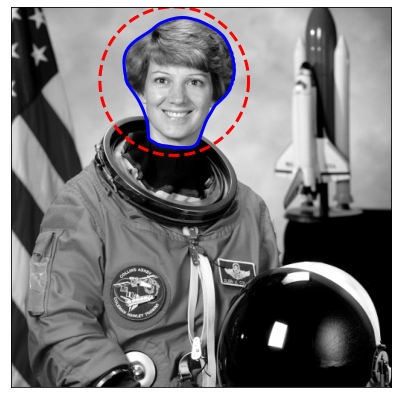

In [5]:
cntr = active_contour(gaussian(img, 3),init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
# Circular boundary
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
# Detected contour
ax.plot(cntr[:, 0], cntr[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

In [6]:
img = data.text()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The keyword argument `bc` to `active_contour` has been renamed. Use `boundary_condition=` instead. `bc` will be removed in scikit-image v0.18.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  


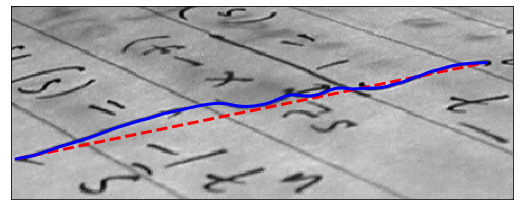

In [7]:
x = np.linspace(5, 424, 100)
y = np.linspace(136, 50, 100)
init = np.array([x, y]).T

cntr = active_contour(gaussian(img, 1), init, bc='fixed',
                       alpha=0.1, beta=1.0, w_line=-5, w_edge=0, gamma=0.1)

fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(cntr[:, 0], cntr[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()